# HR Analytics Project- Understanding the Attrition in HR

Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
# import Liabraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
for i in data.columns:
    if data[i].dtype == object:
        print(str(i) + ':'+ str(data[i].unique()))
        print('________________________________________________________________________________________________')

Attrition:['Yes' 'No']
________________________________________________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
________________________________________________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
________________________________________________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
________________________________________________________________________________________________
Gender:['Female' 'Male']
________________________________________________________________________________________________
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
_____________________________________

In [6]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [7]:
# Over18 feature has only 1 entry which is y so we can drop this feature
data = data.drop('Over18',axis = 1)

# Employeecount feature has only 1 entry which is 1 so we can drop this feature
data = data.drop('EmployeeCount', axis=1)

# EmployeeNumber feature is not significant and in not going to impact our label so we can drop
data = data.drop('EmployeeNumber',axis=1)

In [8]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [9]:
# since StandardHours feature has only entry as 80 so we can drop that column.
data = data.drop('StandardHours',axis=1)

In [10]:
data.shape

(1470, 31)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [12]:
#Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace=True)
data.shape

(1470, 31)

In [13]:
# Checking and removing if there is any Duplicate entry present in our datset
data.drop_duplicates(inplace=True)
data.shape

(1470, 31)

No Duplicate record found

In [14]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns =[]
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [15]:
# checking for Multicollinearity using VIF
w = data[list(data.columns)]

vif_info= pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info["Column"] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
21,124.654850,PerformanceRating
12,52.588213,JobLevel
20,42.499948,PercentSalaryHike
0,33.357814,Age
16,32.085296,MonthlyIncome
26,15.604104,WorkLifeBalance
11,15.236815,JobInvolvement
24,14.641943,TotalWorkingYears
4,13.044796,Department
10,11.246412,HourlyRate


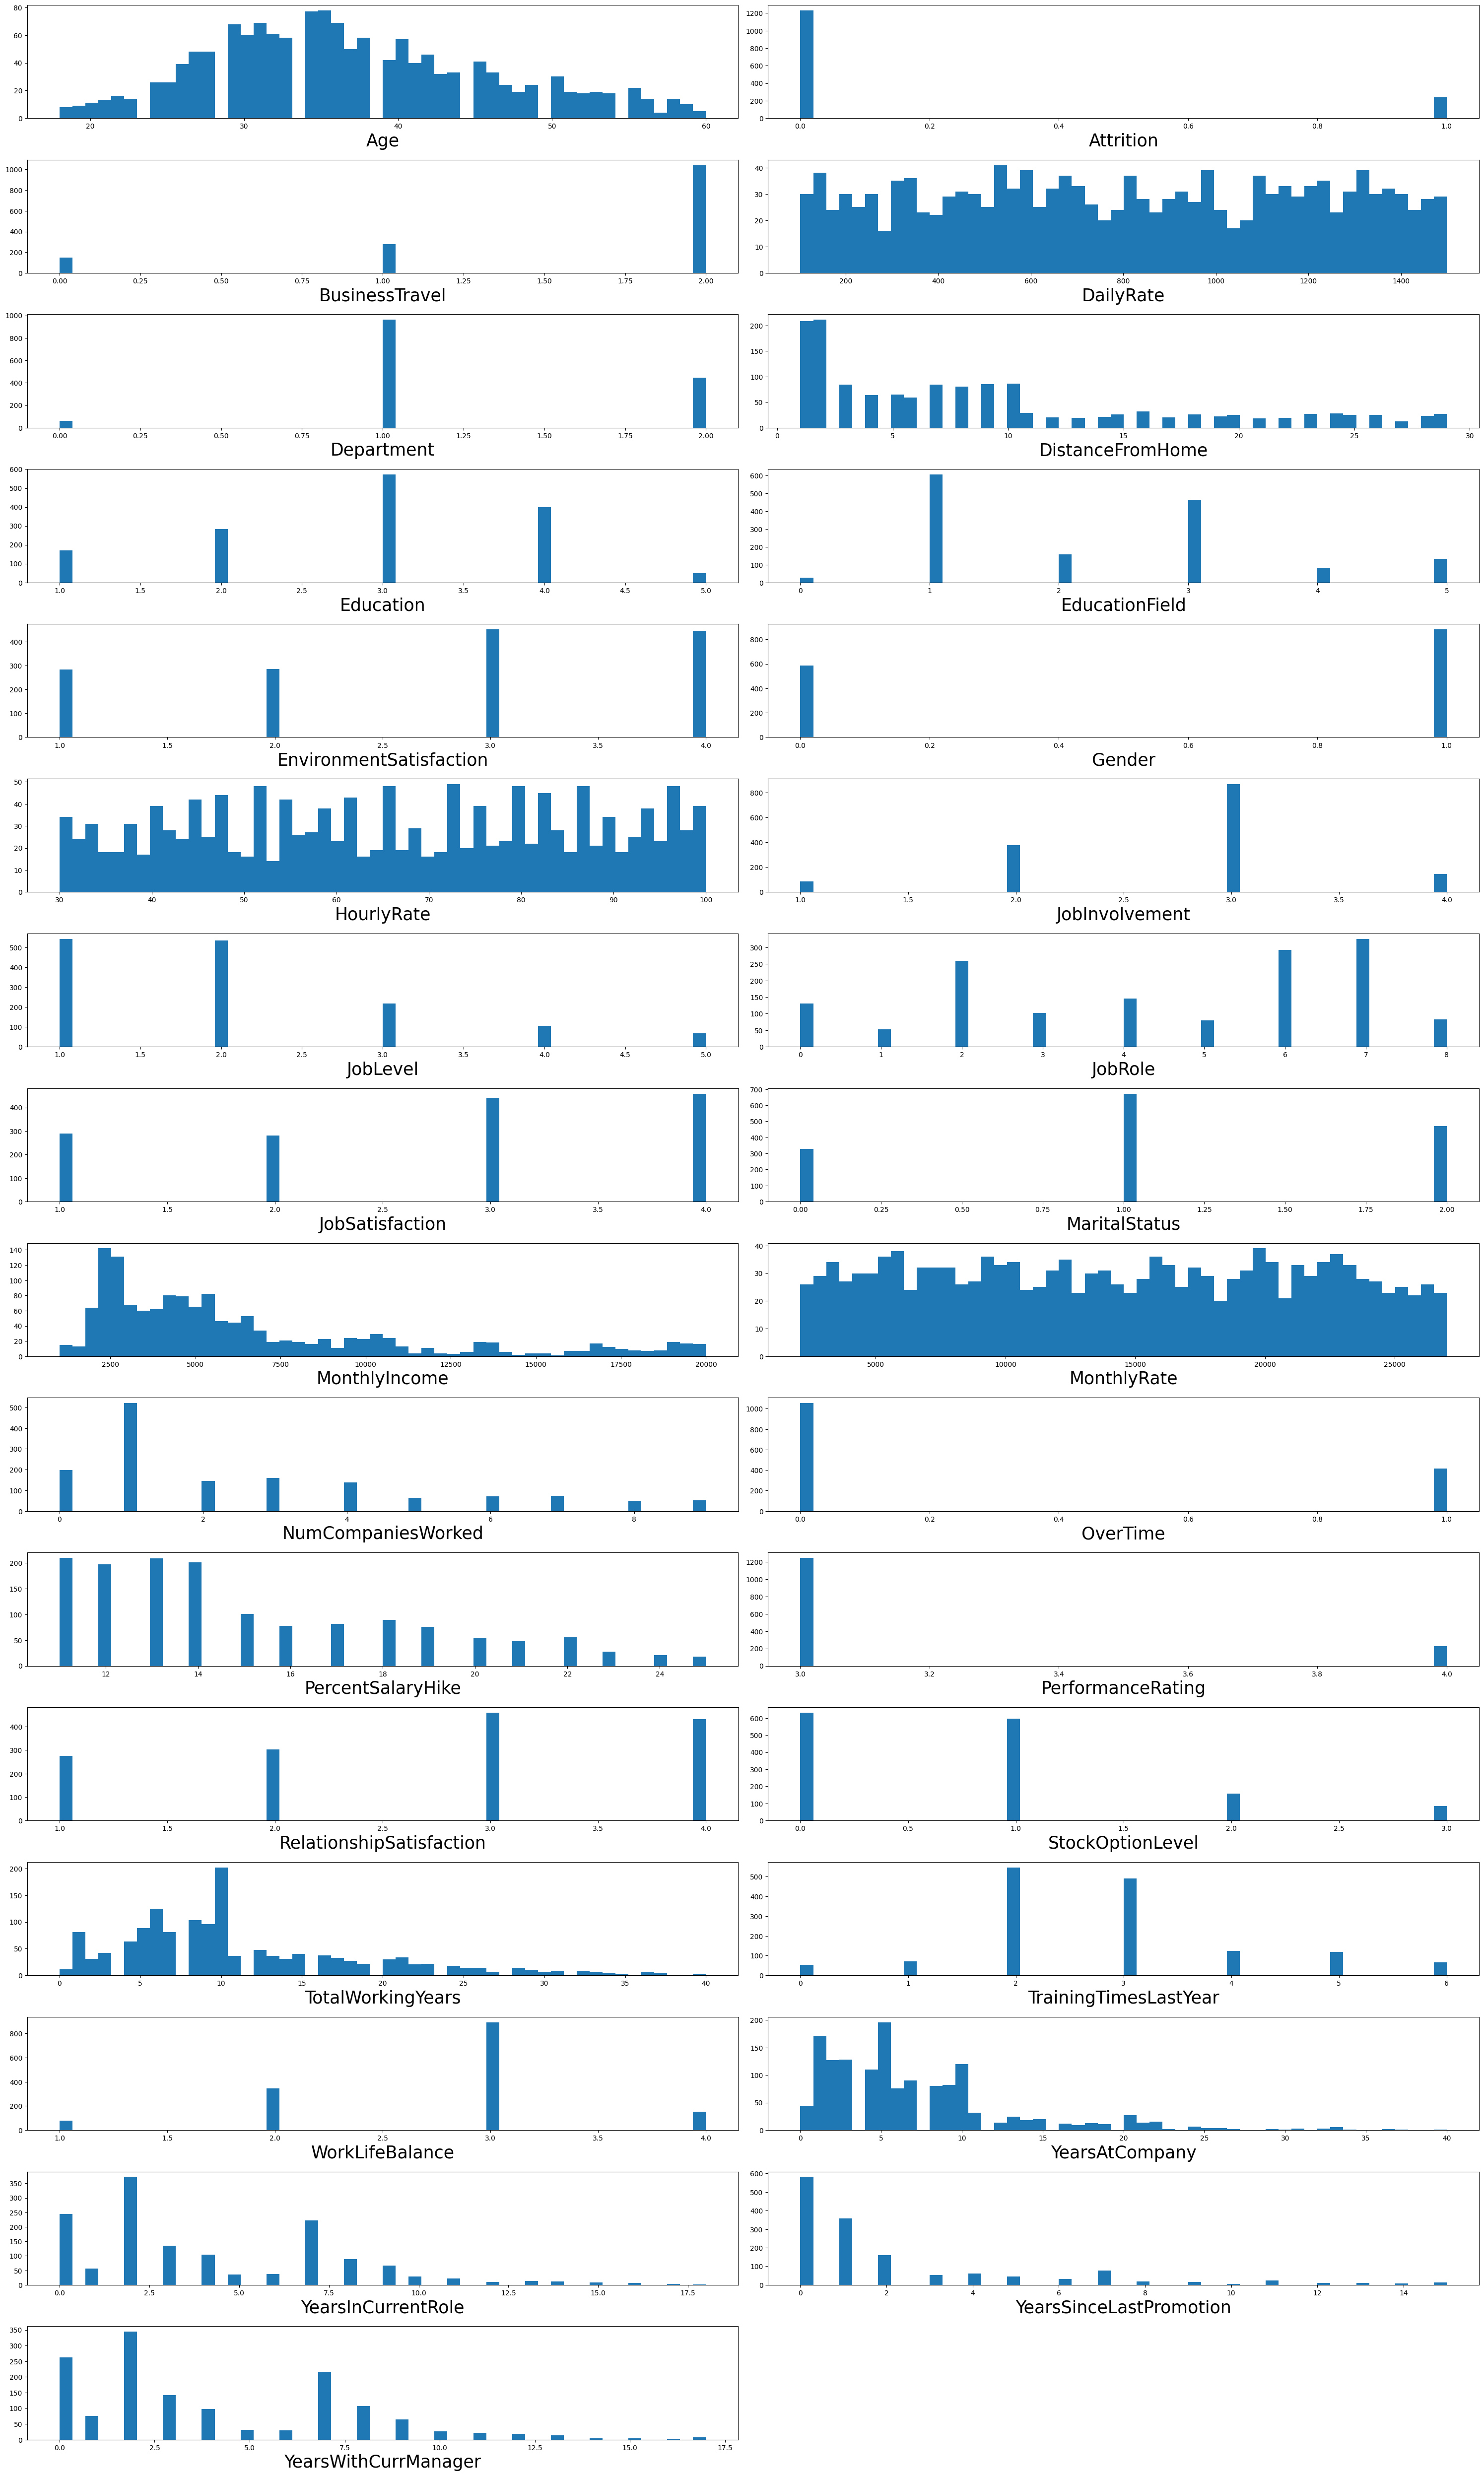

In [16]:
plt.figure(figsize =[30,50])
plotnumber=1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        plt.hist(data[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

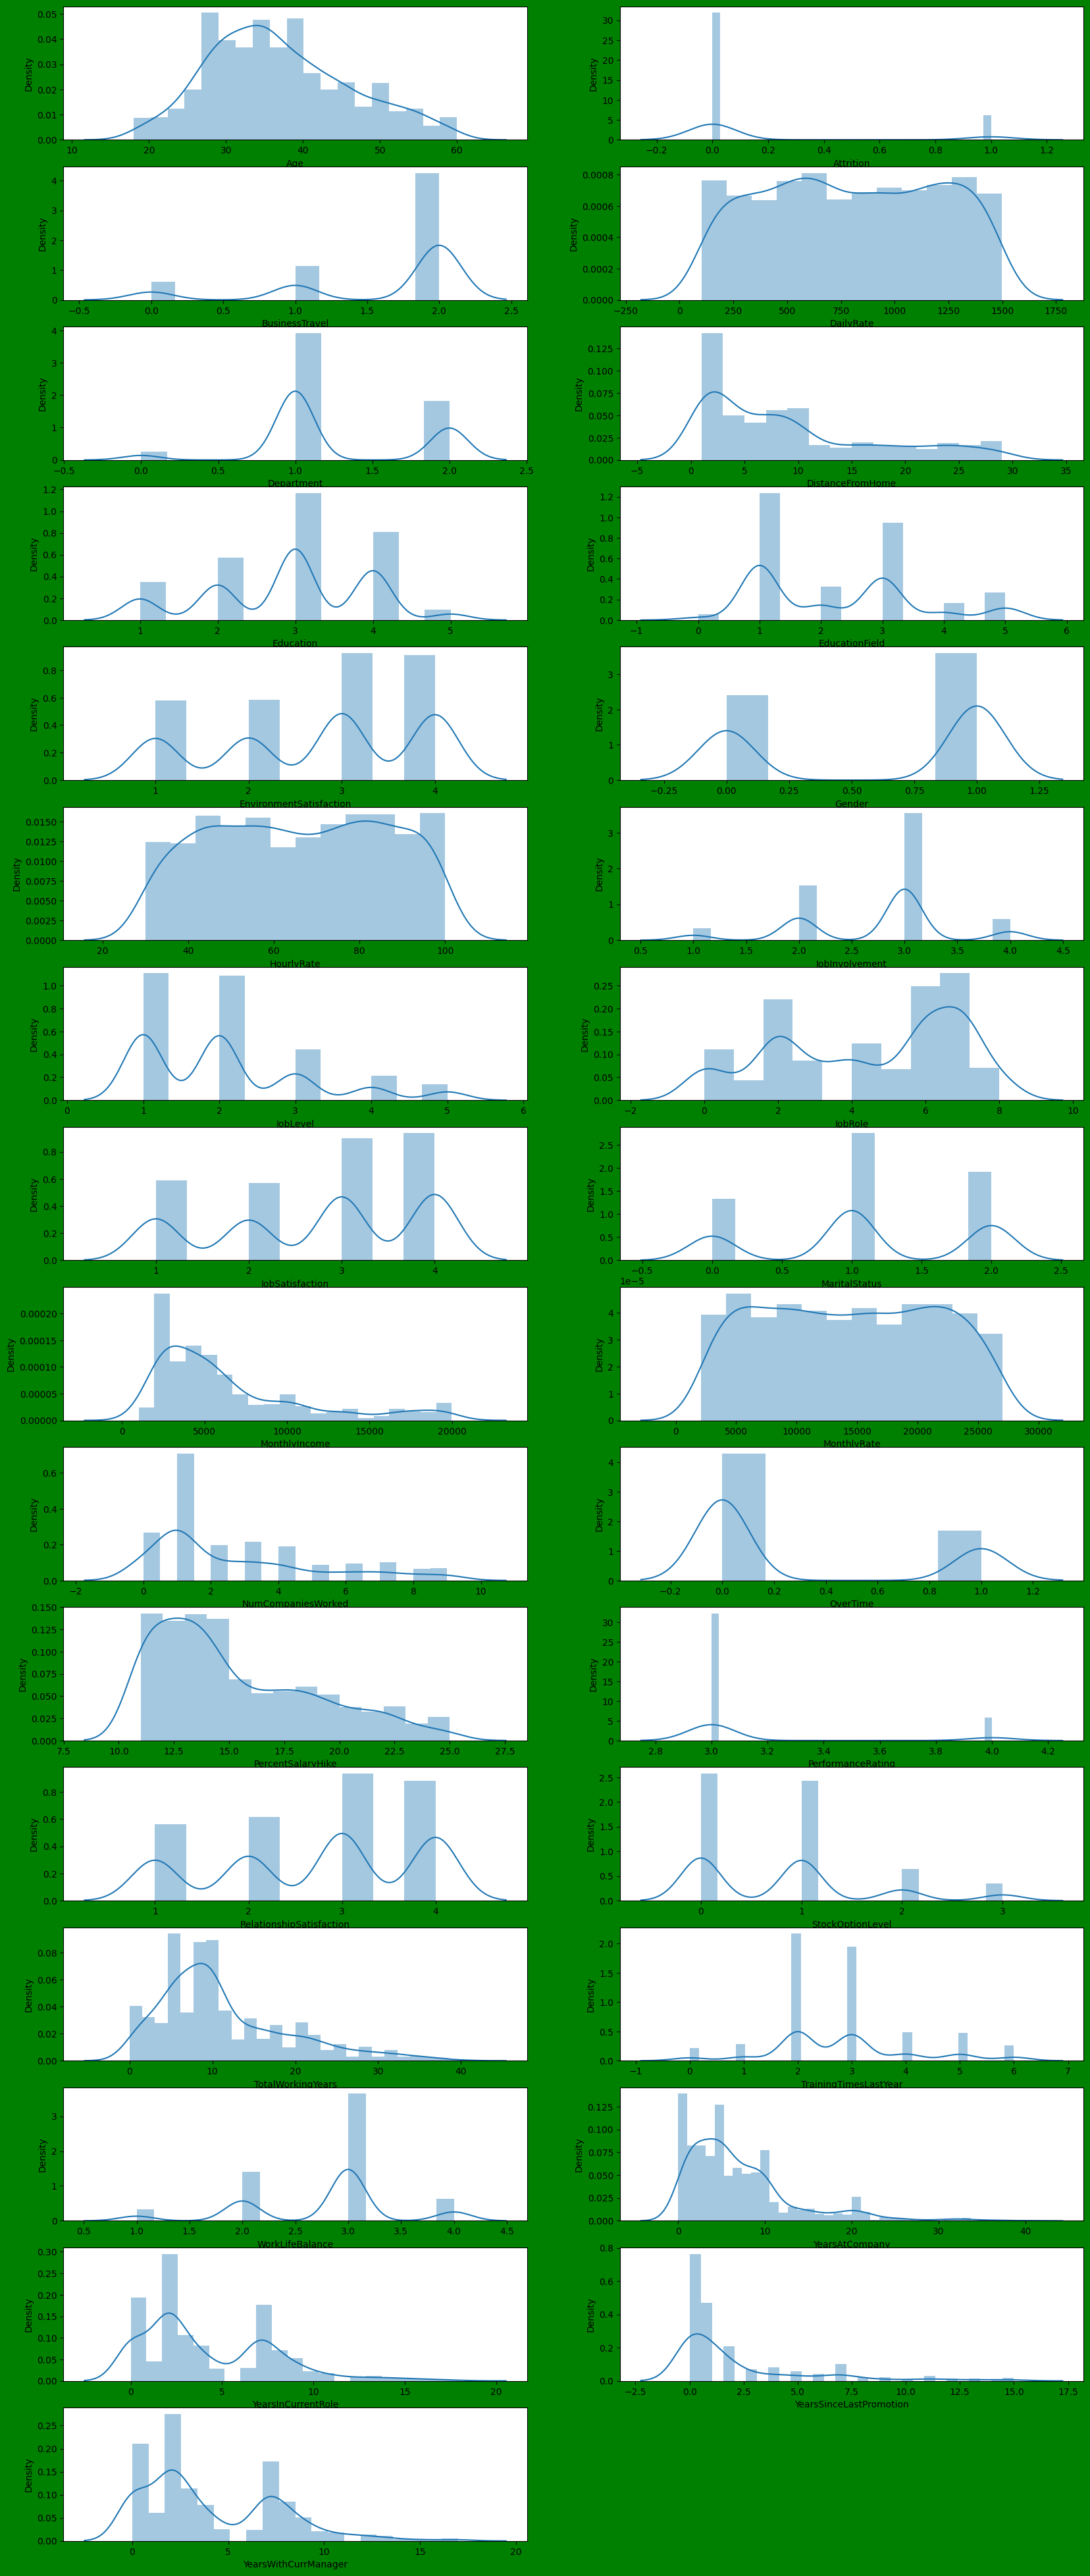

In [17]:
plt.figure(figsize =[20,50],facecolor='green')
plotnumber=1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(16,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

We can see some skewness in some Features so let's plot a box plot and see

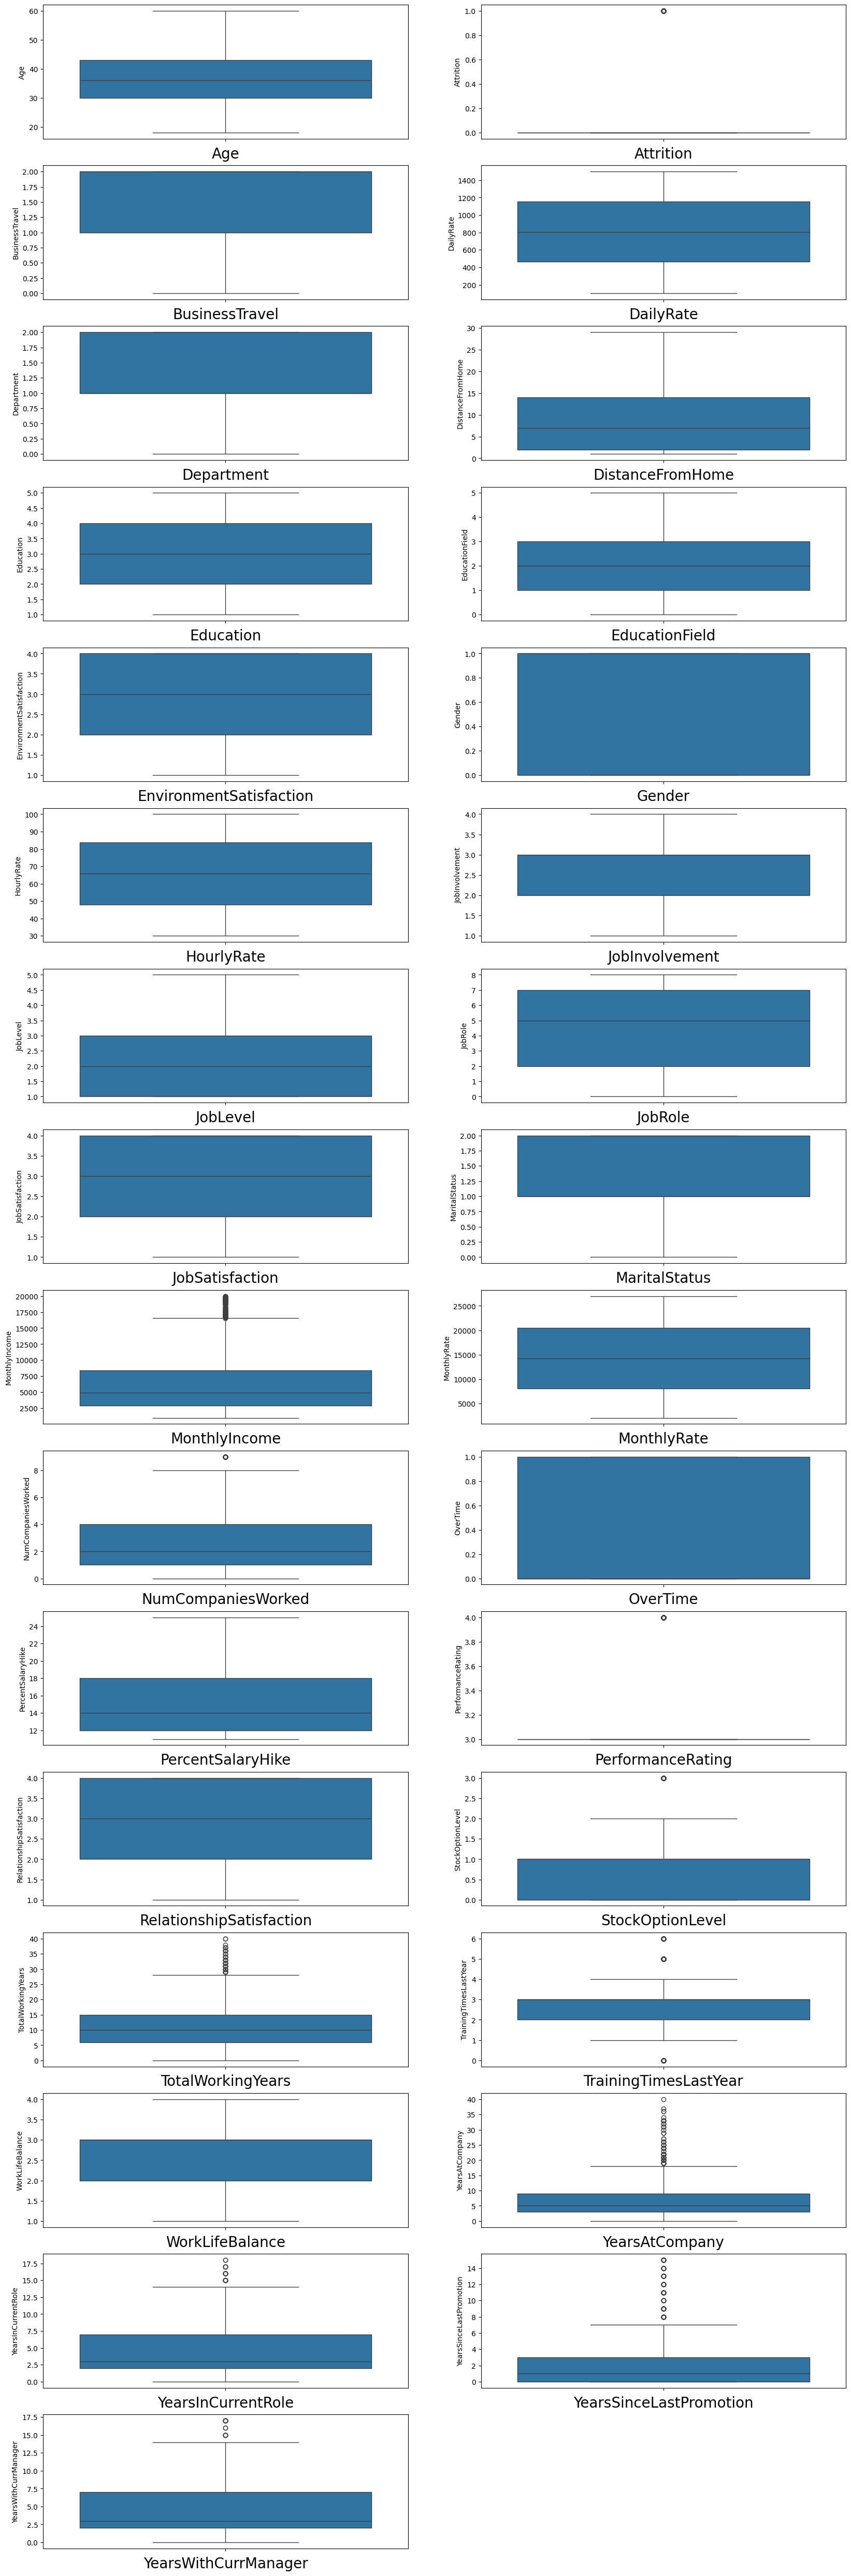

In [18]:
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(25,2,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

From Above Figures, it is clear that there are outliers present in features like MonthlyIncome, NumCompaniesWorked,TotalWorkingYears, YearsAtCompany, etc

However outliers are present but since these are important features so they have high impact on label so we are not going to remove it.

Let's Check the corelations between Features

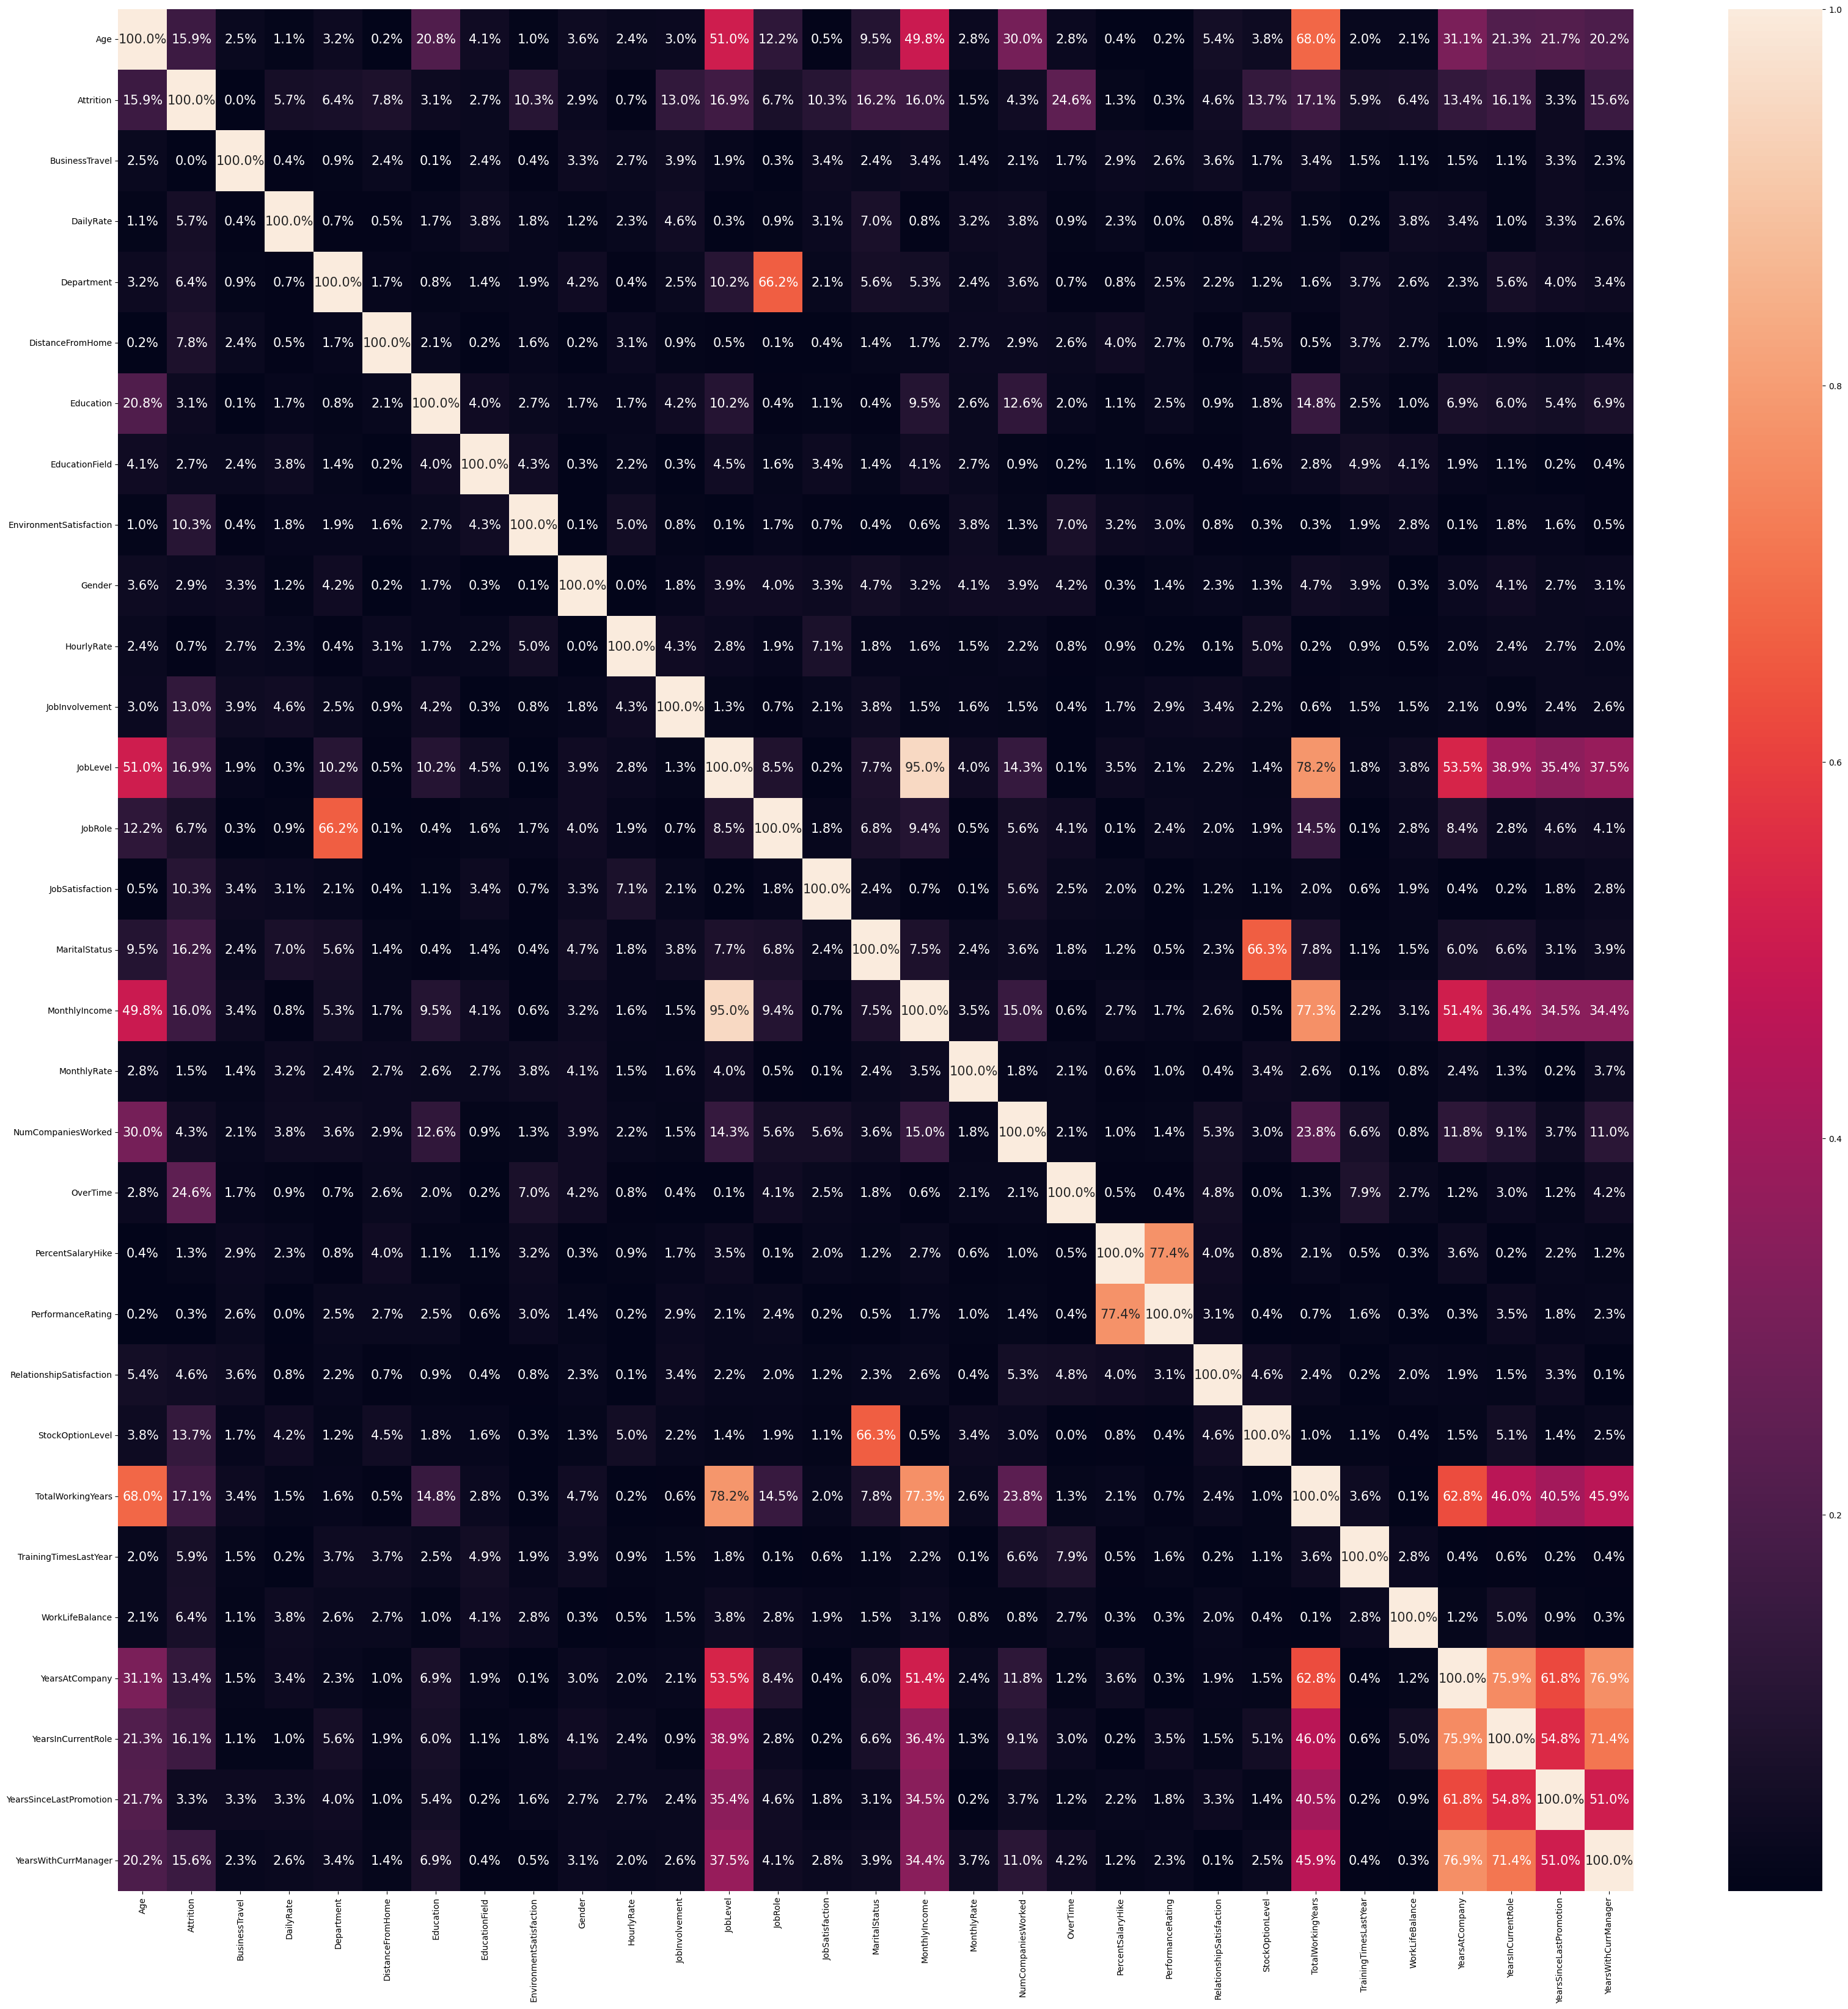

In [19]:
# Checking correlations between Features
df_corr = data.corr().abs()
plt.figure(figsize=(40,40))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15}, fmt ='.1%')
plt.show()

Heatmap Shows the correlation between Features like Age feature has 68 % correlation with TotalWorkingYears features and many more

In [20]:
# Checking if our balanced or not
data["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

This clearly shows our data is imbalanced we need to balance our data using SMOTE
let's balance our data now

In [21]:
# Lets us know split our data into features & labels
x=data.drop('Attrition',axis=1)
y=data["Attrition"]

In [22]:
# Now Lets split our data into Train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=44)

In [23]:
y_train.value_counts()

Attrition
0    921
1    181
Name: count, dtype: int64

In [24]:
sm = SMOTE()

In [25]:
ove_smp=SMOTE(sampling_strategy=0.75)
x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

In [26]:
y_train_ns.value_counts()

Attrition
0    921
1    690
Name: count, dtype: int64

Now Our data seems to be balanced

All Our PreProcessing is over now and Our Data is ready for Model Building

# Model Building

In [27]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [30]:
# Training of model Starts Here
lr.fit(x_train_ns,y_train_ns)
knn.fit(x_train_ns,y_train_ns)
dt.fit(x_train_ns,y_train_ns)
rf.fit(x_train_ns,y_train_ns)

print('Training Complited')

Training Complited


In [48]:
# Lets's Check the scores now
print("Logistic Regression score:",lr.score(x_test,y_test))
print("KNN score:",knn.score(x_test,y_test))
print("Decision Tree score:",dt.score(x_test,y_test))
print("Random Forest score:",rf.score(x_test,y_test))

Logistic Regression score: 0.7364130434782609
KNN score: 0.654891304347826
Decision Tree score: 0.6902173913043478
Random Forest score: 0.8478260869565217


Above scores clealy says the best model is RandomForest

let's see how well our model works on training data

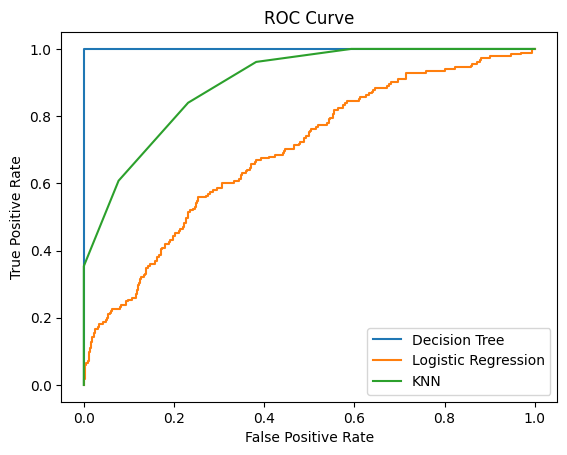

In [42]:
#Confusion Matrix

# Assuming dt, lr, knn are your classifier objects
# we need to predict probabilities from these classifiers first
y_score_dt = dt.predict_proba(x_train)[:, 1]
y_score_lr = lr.predict_proba(x_train)[:, 1]
y_score_knn = knn.predict_proba(x_train)[:, 1]

# call roc_curve with true labels and predicted probabilities
fpr_dt, tpr_dt, _ = roc_curve(y_train, y_score_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_train, y_score_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_train, y_score_knn)

# Now we can plot ROC curves using these values
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

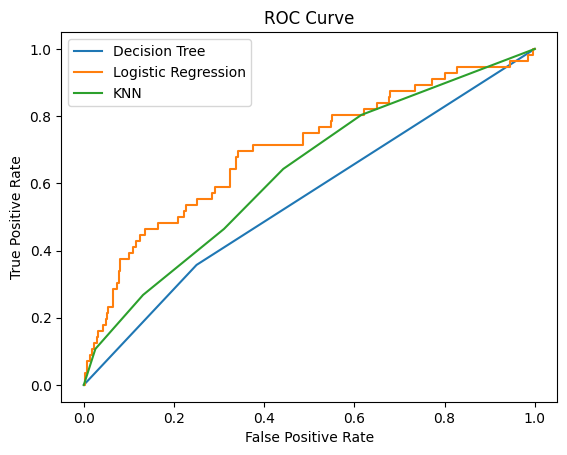

In [46]:
# Assuming dt, lr, knn are your classifier objects
# we need to predict probabilities from these classifiers first
y_score_dt = dt.predict_proba(x_test)[:, 1]
y_score_lr = lr.predict_proba(x_test)[:, 1]
y_score_knn = knn.predict_proba(x_test)[:, 1]

# call roc_curve with true labels and predicted probabilities
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)

# Now we can plot ROC curves using these values
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [47]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [49]:
print("Logistic Regression score:",accuracy_score(y_test,lr_pred))
print("KNN score:",accuracy_score(y_test,knn_pred))
print("Decision Tree score:",accuracy_score(y_test,dt_pred))
print("Random Forest score:",accuracy_score(y_test,rf_pred))

Logistic Regression score: 0.7364130434782609
KNN score: 0.654891304347826
Decision Tree score: 0.6902173913043478
Random Forest score: 0.8478260869565217


From all the above abservations and scores, it's clear that RandomForest model is working the best so we will move ahead with RandomForest.

# Hyperparameter Tuning

In [51]:
# Let's do some Hyperparameter tuning using GridSearchCV algorithm
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(10,20),
           'min_samples_leaf':range(2,15),
           'min_samples_split':range(2,10),
           'max_leaf_nodes':range(2,5)}

In [53]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [54]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [55]:
dec_tree = DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes=4, min_samples_split=2, max_depth=10,min_samples_leaf=2)
r_f = RandomForestClassifier(criterion = 'gini',max_leaf_nodes=3, min_samples_split=2, max_depth=10,min_samples_leaf=2)

dec_tree.fit(x_train_ns,y_train_ns)
r_f.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2)

In [66]:
y1_pred = dec_tree.predict(x_test)
y2_pred = r_f.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y1_pred)
accuracy2 = accuracy_score(y_test, y2_pred)

print("Accuracy for Decision Tree Classifier:", accuracy1)
print("Accuracy for Random Forest Classifier:", accuracy2)

Accuracy for Decision Tree Classifier: 0.7554347826086957
Accuracy for Random Forest Classifier: 0.845108695652174


The best accuracy is given by Random forest model

# Saving a Model

In [74]:
import joblib
joblib.dump(rf,"HR Analysis Project")

['HR Analysis Project']